In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

from PyGEECSPlotter.scan_data_analysis import ScanDataAnalyzer
from PyGEECSPlotter.image_analysis import ImageAnalyzer
from PyGEECSPlotter.widgets import get_selection_box
from PyGEECSPlotter.utils import plot_alignment_overview

import PyGEECSPlotter.geecs_cmaps as gcm

analyzer = ImageAnalyzer()

Not using CMU Sans Serif


In [2]:
diagnostic_dicts = [
    {'diagnostic': 'CAM-2BL-DM',
      'file_ext' : '.png',
      'target_on' : True,
      'crosshair' : 1,
      'cmap' : gcm.enhance_low(),
    },
    
    {'diagnostic': 'CAM-2BL-M2A',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : 'viridis',
    },
    
    {'diagnostic': 'CAM-2BL-M4A',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : 'jet',
    },
    
    {'diagnostic': 'CAM-2BL-F3M5',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.enhance_low(),
    },
    
    {'diagnostic': 'CAM-2BL-F3M7',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.enhance_low(),
    },
    
    {'diagnostic': 'CAM-PL1-BesselM1',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.enhance_low(),
    },
    
    {'diagnostic': 'CAM-PL1-2-BesselM3',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.enhance_low(),
    },
    

    {'diagnostic': 'CAM-PL1-3-BesselM4',
      'file_ext' : '.png',
      'target_on' : True,
      'crosshair' : 1,
       'cmap' : gcm.white_blue_yellow(),
    },
                    
]

alignment_name = '2BL'

In [3]:
diagnostic_dicts = [
    {'diagnostic': 'CAM-1BL-DM',
      'file_ext' : '.png',
      'target_on' : True,
      'crosshair' : 1,
      'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-CompInput',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-CompWindow',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-M1',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-M2Near',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-M5',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    
    {'diagnostic': 'CAM-1BL-Ghost',
     'file_ext' : '.png',
     'target_on' : True,
     'crosshair' : 1,
     'cmap' : gcm.white_blue_yellow(),
    },
    

    {'diagnostic': 'CAM-HPD-CCD',
      'file_ext' : '.png',
      'target_on' : True,
      'crosshair' : 1,
       'cmap' : gcm.white_blue_yellow(),
    },
                    
    {'diagnostic': 'CAM-HPD-HolyWedge',
      'file_ext' : '.png',
       'target_on' : True,
       'crosshair' : 2,
       'cmap' : 'RdBu',
        },
]

alignment_name = '1BL'


In [4]:
# Define which scan to look at 

experiment_dir = 'N:\data'
_, _, _, _, _, sfile_disp = get_selection_box(experiment_dir, display_widgets=True)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [5]:
# Select sfile from GUI
sfilename = sfile_disp.value

print("sfilename = r'%s'" %sfilename)

sfilename = r'N:\data\Y2025\08-Aug\25_0814\analysis\s7.txt'


In [6]:
# Load the Scalar Data for that scan in, and filter any data if desired

scan_data = ScanDataAnalyzer(sfilename=sfilename)
scan_data.load_scan_data()


No directory found


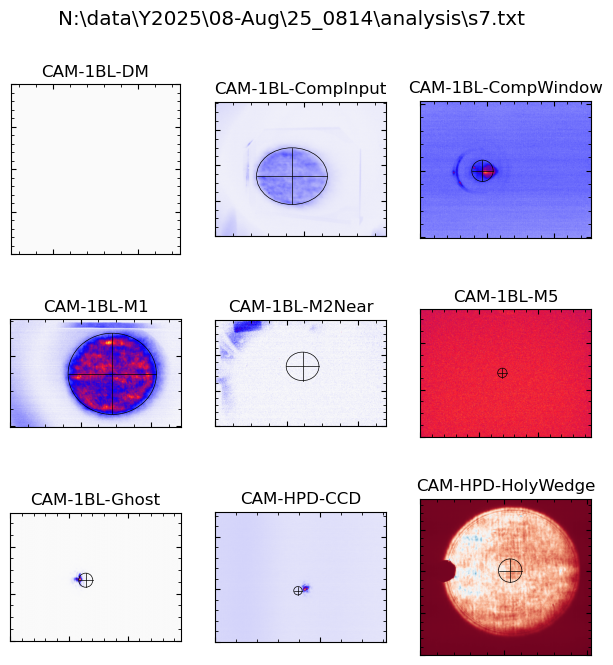

FileNotFoundError: [Errno 2] No such file or directory: 'N:\\data\\Y2025\\08-Aug\\25_0814\\analysis\\Scan007\\1BL_alignment.png'

In [7]:
# Plot the alignment

for d in diagnostic_dicts:
    diagnostic = d['diagnostic']
    file_ext = d['file_ext']
    
    analyzer = ImageAnalyzer(diagnostic=diagnostic, file_ext=file_ext)
    
    scan_data.add_file_list_to_scan_data(diagnostic, file_ext, remove_missing_files=False)

    tmp = scan_data.data[scan_data.data['%s file_exists' %diagnostic] != 0].reset_index(drop=True)
    if len(tmp) > 0:
        filename = tmp['%s file_list' % diagnostic][0]
        data = analyzer.load_data(filename)
        data, _ = analyzer.analyze_data(data, analyzer_dict={})
        d['data'] = data
    else:
        d['data'] = np.zeros((2,2))
    
fig, axes = plot_alignment_overview(diagnostic_dicts,
                            sfilename, 
                            display_dict={} 
                           )

fig.savefig( os.path.join(scan_data.analysis_dir, f'{alignment_name}_alignment.png') , dpi=600)

In [ ]:
scan_data.open_analysis_dir()